## Set up
`Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`

In [ ]:
!nvidia-smi

import os
HOME = os.getcwd()

Mon Jan 22 17:00:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Use Google Drive (for retreiving weight files)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# change "/content/gdrive/MyDrive/"  to "/mydrive"
!ln -s /content/gdrive/MyDrive/ /mydrive

Mounted at /content/gdrive


In [ ]:
__LINKS__ = {
    'racist': 'https://drive.google.com/drive/folders/1--cYDN5-wxAO36uBs9y-CKmye7aKUIQt?usp=sharing'
    # racist1.0 can predict 5 classes, racist2.0 can predict 9 classes
}

In [ ]:
!mkdir racist
!unzip /mydrive/Self/racist/dataset-racistv4.zip -d racist
!rm -r racist/__MACOSX/

Streaming output truncated to the last 5000 lines.
  inflating: racist/mexican/wd_8.jpg  
  inflating: racist/mexican/me_ad_16_17.jpg  
  inflating: racist/mexican/me_ad_11_36.jpg  
  inflating: racist/mexican/me_ad_7_4.jpg  
  inflating: racist/mexican/me_ad_18_12.jpg  
  inflating: racist/mexican/me_ad_11_22.jpg  
  inflating: racist/mexican/me_ad_6_76.jpg  
  inflating: racist/mexican/me_ad_6_62.jpg  
  inflating: racist/mexican/me_ad_1_43.jpg  
  inflating: racist/mexican/dr_27.jpg  
  inflating: racist/mexican/coke_35.jpg  
  inflating: racist/mexican/me_ad_8_67.jpg  
  inflating: racist/mexican/me_ad_8_73.jpg  
  inflating: racist/mexican/coke_21.jpg  
  inflating: racist/mexican/dr_33.jpg  
  inflating: racist/mexican/me_ad_1_57.jpg  
  inflating: racist/mexican/coke_20.jpg  
  inflating: racist/mexican/me_ad_8_72.jpg  
  inflating: racist/mexican/me_ad_1_56.jpg  
  inflating: racist/mexican/dr_32.jpg  
  inflating: racist/mexican/dr_26.jpg  
  inflating: racist/mexican/me_ad_1_

Install libraries

In [ ]:
# Pip install method (recommended)

!pip install ultralytics --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image


Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


Analyze data inside dataset

Setup dataset directory

In [ ]:
__CLASSES__ = os.listdir('racist')
__CLASSES__

['arabs',
 'japanese',
 'british',
 'mexican',
 'american',
 'black',
 'chinese',
 'russian',
 'vietnamese',
 'indian']

In [ ]:
%cd {HOME}
!mkdir {HOME}/dataset
%cd dataset
!mkdir train
!mkdir val
!mkdir test
for d in ['train', 'val', 'test']:
    %cd {d}
    for c in __CLASSES__:
        !mkdir {c}
    %cd ..


/content
/content/dataset
/content/dataset/train
/content/dataset
/content/dataset/val
/content/dataset
/content/dataset/test
/content/dataset


Configure number of images per type and the ratios to train

In [ ]:

%cd {HOME}
tvtratio = [0.8, 0.2, 0]    # Ratio of train, valid, and test     #initially [0.7, 0.2, 0.1]


/content


Then copy from drive to dataset folder.

In [ ]:
%cd {HOME}
import numpy as np
import shutil

processing_images = 0
total_images = sum([len(os.listdir(os.path.join('racist', cl))) for cl in __CLASSES__])

for cl in __CLASSES__:
    i = 0
    N = len(os.listdir(os.path.join('racist', cl)))
    for img in os.listdir(os.path.join('racist', cl)):
        absolute_path = os.path.join('racist', cl, img)

        # Randomizer
        r = np.random.uniform(0, 1)
        if r<tvtratio[0]:                 split = 'train'
        elif r<tvtratio[0]+tvtratio[1]:   split = 'val'
        else:                             split = 'test'

        destination = os.path.join('dataset', split, cl, img)

        # Copy from drive to dataset folder
        shutil.copy(absolute_path, destination)

        i+=1
        processing_images += 1

        print(f"-- Working on {i}/{N} images of [{cl}]      About {processing_images/total_images*100:.2f}% progress.          (->{split})")

    res = [len(os.listdir(os.path.join('dataset', split, cl))) for split in ['train', 'val', 'test']]
    print(f"Class: {cl:<15} Train: {res[0]:<5} Val: {res[1]:<5} Test: {res[2]:<5}")



Streaming output truncated to the last 5000 lines.
-- Working on 1480/1676 images of [russian]      About 76.87% progress.          (->train)
-- Working on 1481/1676 images of [russian]      About 76.88% progress.          (->train)
-- Working on 1482/1676 images of [russian]      About 76.88% progress.          (->train)
-- Working on 1483/1676 images of [russian]      About 76.89% progress.          (->train)
-- Working on 1484/1676 images of [russian]      About 76.89% progress.          (->train)
-- Working on 1485/1676 images of [russian]      About 76.89% progress.          (->train)
-- Working on 1486/1676 images of [russian]      About 76.90% progress.          (->train)
-- Working on 1487/1676 images of [russian]      About 76.90% progress.          (->train)
-- Working on 1488/1676 images of [russian]      About 76.91% progress.          (->train)
-- Working on 1489/1676 images of [russian]      About 76.91% progress.          (->train)
-- Working on 1490/1676 images of [russ

Use this if test set is empty.

In [ ]:
shutil.copytree('dataset/val', 'dataset/test', dirs_exist_ok=True)

'dataset/test'

## Custom Training

This is for ClearML for viewing training process better, if you don't have ClearML, skip it

In [ ]:
!pip install clearml --quiet
from google.colab import userdata

import clearml
clearml.browser_login()

%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml

__CLEARML_API_ACCESS_KEY__ = userdata.get('clearml_access_key')
__CLEARML_API_SECRET_KEY__ = userdata.get('clearml_secret_key')

%env CLEARML_API_ACCESS_KEY={__CLEARML_API_ACCESS_KEY__}
%env CLEARML_API_SECRET_KEY={__CLEARML_API_SECRET_KEY__}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=K7JVSHVXBWCCOM6SDD24
env: CLEARML_API_SECRET_KEY=LHEoMMOzyMEMpQQyW6zFQiRsy0JwABG9yxA1bkU91lAIBL3YFi


In [ ]:
%cd {HOME}
!yolo task=classify mode=train model=/mydrive/Self/racist/racistv4.pt data=dataset epochs=10 plots=True batch=32 lr0=0.00015 lrf=0.00015 optimizer=SGD
# cfg/defaults.yaml:
# mosaic=0 erasing=0 hsv_h=0 hsv_s=0 hsv_v=0 translate=0

/content
Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/mydrive/Self/racist/racistv4.pt, data=dataset, epochs=10, time=None, patience=50, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

Everything after train is inside content/runs/classify/train



In [ ]:
!yolo train resume model=runs/classify/train11/weights/best.pt batch=100

In [ ]:
!cp {HOME}/runs/classify/train/weights/last.pt /mydrive/Self/racist/racistv4.pt

## Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=classify mode=val model=/mydrive/Self/racist/racistv4.pt data=dataset

/content
Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36197386 parameters, 0 gradients, 98.7 GFLOPs
train: /content/dataset/train... found 17281 images in 10 classes ✅ 
val: /content/dataset/val... found 4310 images in 10 classes ✅ 
test: /content/dataset/test... found 4310 images in 10 classes ✅ 
val: Scanning /content/dataset/val... 4310 images, 0 corrupt: 100% 4310/4310 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 270/270 [00:20<00:00, 13.35it/s]
                   all      0.716      0.949
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

Testing on test set

In [ ]:
%cd {HOME}
!yolo classify predict model=/mydrive/Self/racist/racist2.0.pt source=img save=True

/content
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56134729 parameters, 0 gradients, 153.8 GFLOPs

image 1/9 /content/img/418483579_946840550352766_1944094188225765267_n.jpg: 224x224 vietnamese 0.95, chinese 0.05, indian 0.00, japanese 0.00, british 0.00, 13.9ms
image 2/9 /content/img/danh.png: 224x224 chinese 0.86, british 0.08, mexican 0.03, vietnamese 0.02, russian 0.01, 14.7ms
image 3/9 /content/img/duc.png: 224x224 chinese 1.00, vietnamese 0.00, black 0.00, japanese 0.00, indian 0.00, 13.8ms
image 4/9 /content/img/food.png: 224x224 russian 1.00, british 0.00, mexican 0.00, chinese 0.00, vietnamese 0.00, 13.8ms
image 5/9 /content/img/khang.png: 224x224 chinese 0.84, vietnamese 0.08, japanese 0.03, arabs 0.03, black 0.01, 13.7ms
image 6/9 /content/img/lmp.png: 224x224 chinese 0.62, japanese 0.33, vietnamese 0.05, mexican 0.00, arabs 0.00, 13.7ms
image 7/9 /content/img/ooo.png: 224x224 japanese 0.65,

In [ ]:
!mkdir /mydrive/Self/racist/testv2/vietnamese

In [ ]:
!cp -r runs/classify/predict11/. /mydrive/Self/racist/testv2/vietnamese

Testing on all classes on test set

In [ ]:
def test(path, batch_size=300, accept=1):
    if accept < 1:
        accept = 1
    if accept > 4:
        accept = 4

    model = YOLO(path)

    ground_truth = []
    predictions = []
    PRECISIONS = []

    for cl in __CLASSES__[:]:
        print(f'\n---- Testing on class {cl} ----\n')

        __PATH_TO_CLASS__ = os.path.join('dataset', 'val', cl)
        __PATH_IMG_LIST__ = [os.path.join(__PATH_TO_CLASS__, fileName) for fileName in os.listdir(__PATH_TO_CLASS__)]

        if f'dataset/val/{cl}/.DS_Store' in __PATH_IMG_LIST__:
            __PATH_IMG_LIST__.remove(f'dataset/val/{cl}/.DS_Store')

        total_img = len(__PATH_IMG_LIST__)
        T = 0

        # Divide into batches to test because not enough RAM
        batches = [__PATH_IMG_LIST__[i:i+batch_size] for i in range(0, total_img, batch_size)]

        for idx, batch in enumerate(batches):
            print(f">> Batch {idx+1} over {len(batches)}")
            results = model(source=batch)
            for result in results:
                pred_classes = [result.names[result.probs.top5[i]] for i in range(accept)]

                ground_truth.append(cl)

                if cl in pred_classes:
                    T+=1
                    predictions.append(cl)
                else:
                    predictions.append(pred_classes[0])

        PRECISIONS.append((T/total_img*100, total_img, cl))
        print(f"Precision: {T/total_img*100:.2f}%")

    return {
        'groundTruth': ground_truth,    # [record=(precision, instances, class)]
        'predictions': predictions,     # [class]   len=total_instances
        'precisions': PRECISIONS        # [class]   len=total_instances
    }


In [ ]:
test_result = test('runs/classify/train/weights/last.pt', batch_size=600, accept=1)
precisions = test_result['precisions']    # [record=(precision, instances, class)]
groundtruth = test_result['groundTruth']  # [class]   len=total_instances
predictions = test_result['predictions']  # [class]   len=total_instances


---- Testing on class arabs ----

>> Batch 1 over 1

0: 224x224 chinese 0.54, american 0.36, arabs 0.06, russian 0.02, british 0.02, 1: 224x224 arabs 1.00, black 0.00, chinese 0.00, japanese 0.00, indian 0.00, 2: 224x224 arabs 0.91, british 0.03, vietnamese 0.02, japanese 0.02, chinese 0.01, 3: 224x224 british 0.32, russian 0.28, arabs 0.28, black 0.07, indian 0.04, 4: 224x224 arabs 1.00, mexican 0.00, russian 0.00, indian 0.00, american 0.00, 5: 224x224 arabs 0.99, indian 0.01, japanese 0.00, vietnamese 0.00, mexican 0.00, 6: 224x224 arabs 0.55, black 0.45, british 0.00, mexican 0.00, vietnamese 0.00, 7: 224x224 arabs 1.00, indian 0.00, mexican 0.00, chinese 0.00, british 0.00, 8: 224x224 black 1.00, japanese 0.00, mexican 0.00, arabs 0.00, indian 0.00, 9: 224x224 arabs 0.92, black 0.03, mexican 0.02, british 0.01, indian 0.01, 10: 224x224 arabs 0.56, indian 0.26, chinese 0.08, vietnamese 0.07, british 0.01, 11: 224x224 mexican 0.97, black 0.02, indian 0.00, vietnamese 0.00, american

In [ ]:
TOTAL_TEST = sum([rec[1] for rec in precisions])
WEIGHTED_AVG_PRECISION = sum([rec[0]*rec[1]/TOTAL_TEST for rec in precisions])
print(precisions)
print(f'Weighted average: {WEIGHTED_AVG_PRECISION}%')

[(77.74869109947645, 382, 'arabs'), (76.96850393700787, 508, 'japanese'), (72.26107226107226, 429, 'british'), (73.62637362637363, 364, 'mexican'), (67.31898238747553, 511, 'american'), (74.72826086956522, 368, 'black'), (62.42038216560509, 471, 'chinese'), (70.74626865671641, 335, 'russian'), (72.60869565217392, 460, 'vietnamese'), (69.70954356846472, 482, 'indian')]
Weighted average: 71.60092807424594%


Confusion matrix

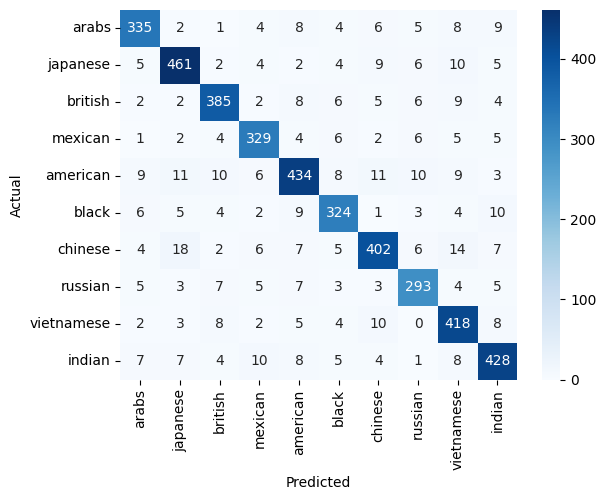

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(groundtruth, predictions, labels=__CLASSES__)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=__CLASSES__, yticklabels=__CLASSES__)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()